## Classification task


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data import DataLoader
import torch.nn as nn
import sys
import matplotlib.pyplot as plt
from tsne_torch import TorchTSNE
import numpy as np
sys.path.append('/home/gridsan/ckoevesdi/.local/lib/python3.9/site-packages/')
from pytorch_metric_learning import losses

sys.path.append('/home/gridsan/ckoevesdi/PooledStatisticsMetamers/poolstatmetamer/')
import utils.statnetencoder as sne
import importlib
import imp
import torch.nn.functional as F

#!wget https://raw.githubusercontent.com/pytorch/pytorch/master/torch/utils/collect_env.py

#sys.path.append(r'C:\Users\chris\Documents\MIT\Statistics_analysis_code\PyTorchSteerablePyramid')
sys.path.append('/home/gridsan/ckoevesdi/PyTorchSteerablePyramid/')
import steerable
import steerable.utils as utils
from steerable.SCFpyr_PyTorch import SCFpyr_PyTorch

torch.manual_seed(16)

#use GPU 2
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda:0


In [5]:
dtd_folder = 'home/gridsan/ckoevesdi/data/OT/dtd_torch/dtd/'

## Creation of the dataset

In [6]:
loading_transforms = transforms.Compose([
    transforms.CenterCrop(size=300),
    transforms.Grayscale(),
    transforms.ToTensor(),  # This will also convert the image from [0, 255] to [0.0, 1.0]
    transforms.ConvertImageDtype(torch.float32)
])

#use training set for now
class_dtd_dataset = torchvision.datasets.DTD(root='/home/gridsan/ckoevesdi/data/OT/dtd_torch/', split='val', 
                                             partition=10, 
                                       transform=loading_transforms, target_transform=None,
                                       download=False) #ah das datenset muss so aussehen wie es auf der website auch ist, deswegen kann man auch download false machen
# Define the batch size (Change this based on your requirements)
batch_size = 1

# Create a DataLoader
classification_dataloader = DataLoader(
    class_dtd_dataset,
    batch_size=batch_size,
    shuffle=True
)
tensor2pil_transform = transforms.ToPILImage()
print(len(class_dtd_dataset))

939


tensor([[[[0.0157, 0.0157, 0.0510,  ..., 0.0588, 0.0549, 0.0431],
          [0.0078, 0.0078, 0.0667,  ..., 0.0824, 0.0039, 0.0039],
          [0.1412, 0.0980, 0.1451,  ..., 0.0588, 0.0039, 0.0078],
          ...,
          [0.0392, 0.0588, 0.0706,  ..., 0.1529, 0.1176, 0.0745],
          [0.0353, 0.0627, 0.0824,  ..., 0.1059, 0.0745, 0.0471],
          [0.0235, 0.0392, 0.0471,  ..., 0.0549, 0.0118, 0.0000]]]])
tensor([12])
torch.Size([1, 1, 300, 300])


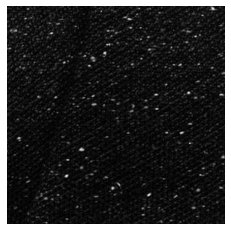

tensor([[[[0.5765, 0.5686, 0.5765,  ..., 0.8863, 0.8941, 0.8118],
          [0.4824, 0.5333, 0.5804,  ..., 0.8549, 0.8471, 0.9059],
          [0.5451, 0.5529, 0.4902,  ..., 0.9255, 0.8588, 0.8588],
          ...,
          [0.2392, 0.2549, 0.2784,  ..., 0.5961, 0.6471, 0.6745],
          [0.3255, 0.3412, 0.3373,  ..., 0.4745, 0.5765, 0.5961],
          [0.4157, 0.4078, 0.4000,  ..., 0.5922, 0.6784, 0.6941]]]])
tensor([14])
torch.Size([1, 1, 300, 300])


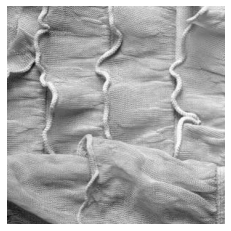

tensor([[[[0.3882, 0.4980, 0.5647,  ..., 0.4510, 0.4549, 0.3922],
          [0.3373, 0.4314, 0.4941,  ..., 0.4118, 0.4392, 0.4392],
          [0.4549, 0.4549, 0.4314,  ..., 0.3686, 0.3333, 0.5412],
          ...,
          [0.5765, 0.4510, 0.3765,  ..., 0.4471, 0.4745, 0.4039],
          [0.8235, 0.6275, 0.4863,  ..., 0.3922, 0.4196, 0.3333],
          [0.8235, 0.7843, 0.6549,  ..., 0.3412, 0.3804, 0.4431]]]])
tensor([36])
torch.Size([1, 1, 300, 300])


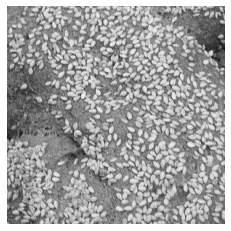

tensor([[[[0.9412, 0.9608, 0.9647,  ..., 0.6431, 0.6314, 0.6314],
          [0.9294, 0.9529, 0.9373,  ..., 0.6902, 0.6824, 0.6667],
          [0.9373, 0.9176, 0.9059,  ..., 0.6471, 0.6941, 0.6902],
          ...,
          [0.2314, 0.2392, 0.2510,  ..., 0.5961, 0.6314, 0.6392],
          [0.2431, 0.2353, 0.2471,  ..., 0.6510, 0.6000, 0.6314],
          [0.2196, 0.2196, 0.2314,  ..., 0.6392, 0.6118, 0.6314]]]])
tensor([34])
torch.Size([1, 1, 300, 300])


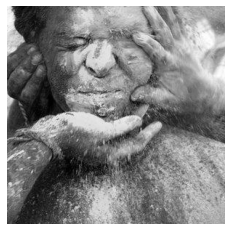

tensor([[[[0.1569, 0.1333, 0.1529,  ..., 0.0980, 0.1098, 0.1216],
          [0.1490, 0.1490, 0.1647,  ..., 0.1020, 0.1176, 0.1294],
          [0.1412, 0.1608, 0.1686,  ..., 0.1333, 0.1529, 0.1686],
          ...,
          [0.1294, 0.1569, 0.1490,  ..., 0.0941, 0.0902, 0.0902],
          [0.1176, 0.1294, 0.1255,  ..., 0.0902, 0.0941, 0.0941],
          [0.1059, 0.0980, 0.0980,  ..., 0.0941, 0.0980, 0.0980]]]])
tensor([10])
torch.Size([1, 1, 300, 300])


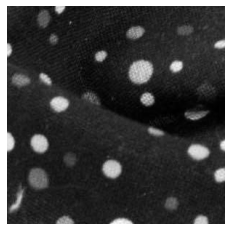

In [7]:
for j, (texture_batch, labels) in enumerate(classification_dataloader):
        # Move data to device and flatten it
        print(texture_batch)
        print(labels)
        output = texture_batch.to(device)
        print(output.shape)
        for i in range(batch_size):
                plt.figure()
                plt.imshow(tensor2pil_transform(output[0,0,:,:]),cmap='gray')
                plt.axis('off')
                plt.show()
        if(j>3):
            break;

In [8]:
import utils.brucenet as bn
brucy = bn.BruceNet(pooling_region_size=1e20, pyramid_params=False, dummy_img = torch.zeros(20,
                                     1,
                                     300,
                                     300)).to(device)

Creating solver: pyramid=UBBBBL_6 pooling=WholeImagePooling()


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
all_statistics = []

for j, (texture_batch, labels) in enumerate(classification_dataloader):
    # Assuming texture_batch has a shape of [20, 5, 1, 128, 128]
    #print(texture_batch.shape)
    output = texture_batch.to(device)
    output = torch.stack([output, output]).squeeze(1)
    #print(output.shape)
    #print(labels)
    statistics = brucy(output)  # This should output a tensor of shape [2, 150]
    statistics = statistics[0,:]
    #print(statistics[0,:])
    # You can now store these statistics, along with the label and original image index
    all_statistics.append({
        'statistics': statistics.cpu().numpy(),
        #'label': labels[i].item(),
        'original_image_index': labels.cpu().numpy()
    })


In [10]:
print(all_statistics[50])

{'statistics': array([ 4.39968675e-01,  7.15428665e-02,  4.07367572e-02,  9.96689796e-02,
        4.02545631e-02,  1.84820350e-02,  1.36975408e-01,  5.35412133e-02,
        2.38262638e-02,  1.85269296e-01,  6.87583908e-02,  2.92421225e-02,
        2.38187790e-01,  7.91054145e-02,  3.05476617e-02,  2.94217438e-01,
        7.95495585e-02,  2.35040728e-02,  3.60602736e-01,  1.16397083e-01,
        1.58360213e-01,  4.14854847e-02,  3.34867388e-01,  1.03855282e-01,
        1.61863118e-01,  1.91724468e-02,  3.06951612e-01,  8.84393528e-02,
        1.44557968e-01,  2.69288775e-02,  3.67549777e-01,  1.12017617e-01,
        1.25867754e-01,  2.15922222e-02,  8.87701437e-02,  6.68946952e-02,
        9.31962579e-02,  7.35865161e-02,  7.60538876e-02,  7.90644959e-02,
        5.54307818e-01,  2.23384023e-01,  3.74792874e-01,  1.10460714e-01,
        5.81243813e-01,  2.54826874e-01,  3.86361480e-01,  1.17858045e-01,
        5.78746080e-01,  2.29949713e-01,  3.84347856e-01,  1.08139418e-01,
        4.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Convert the list of dictionaries to a NumPy array or PyTorch tensor
statistics_array = np.array([item['statistics'] for item in all_statistics])
labels_array = np.array([item['original_image_index'] for item in all_statistics])
print(statistics_array.shape)
# Standardize
scaler = StandardScaler()
scaled_array = scaler.fit_transform(statistics_array)

# Convert NumPy arrays to PyTorch tensors
statistics_tensor = torch.tensor(scaled_array, dtype=torch.float32)
labels_tensor = torch.tensor(labels_array, dtype=torch.long)
#print(statistics_tensor[2])

(939, 150)


In [12]:
from torch.utils.data import Dataset, DataLoader

class StatisticsDataset(Dataset):
    def __init__(self, statistics_tensor, labels_tensor):
        self.statistics = statistics_tensor
        self.labels = labels_tensor
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.statistics[idx], self.labels[idx]

# Create the dataset object
statistics_dataset = StatisticsDataset(statistics_tensor, labels_tensor)

batches = 80
class_statistics_dataloader = DataLoader(statistics_dataset, batch_size=batches, shuffle=True)

Checking does it make sense to even try? Intra-class variation statistics wise

In [13]:
m = statistics_tensor[3]
m2 = statistics_tensor[12]
l = statistics_tensor[90]

distance12 = torch.norm(m-m2).item()
distance13 = torch.norm(m-l).item()
distance23 = torch.norm(m2-l).item()
print(distance12)
print(distance13)
print(distance23)

9.441750526428223
7.055962562561035
8.28835391998291


## Implementing new model now

In [14]:
class EmbeddingModel(nn.Module):
    def __init__(self):
        super(EmbeddingModel, self).__init__()
        self.layer1 = nn.Linear(150, 100)
        self.layer2 = nn.Linear(100, 75)
        self.layer3 = nn.Linear(75, 50)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

class FineTunedModel(nn.Module):
    def __init__(self, num_classes):
        super(FineTunedModel, self).__init__()
        self.base_model = EmbeddingModel()  # The pre-trained feature extractor
        self.classifier = nn.Linear(50, num_classes)  # New classification head

    def forward(self, x):
        x = self.base_model(x)
        x = self.classifier(x)
        return x


In [15]:
# Initialize the fine-tuned model with 47 classes (replace with the actual number of classes in your case)
fine_tuned_model = FineTunedModel(num_classes=47)

# Load the pre-trained weights into the base_model part of fine_tuned_model
fine_tuned_model.base_model.load_state_dict(torch.load('contrastive_model_OT.pth'))

# Move model to the device (CPU or CUDA)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
fine_tuned_model.to(device)


FineTunedModel(
  (base_model): EmbeddingModel(
    (layer1): Linear(in_features=150, out_features=100, bias=True)
    (layer2): Linear(in_features=100, out_features=75, bias=True)
    (layer3): Linear(in_features=75, out_features=50, bias=True)
  )
  (classifier): Linear(in_features=50, out_features=47, bias=True)
)

In [16]:
from torch.nn import CrossEntropyLoss
import torch.optim as optim
# Your classification DataLoader
# classification_dataloader = DataLoader(your_classification_dataset, batch_size=32, shuffle=True)

# Define optimizers and loss function
optimizer_base = optim.Adam(fine_tuned_model.base_model.parameters(), lr=1e-4)
optimizer_classifier = optim.Adam(fine_tuned_model.classifier.parameters(), lr=1e-3)
classification_loss = CrossEntropyLoss()

# Training loop
num_epochs = 50 # Number of epochs for fine-tuning

# Initialize variables for tracking accuracy
total_samples = 0
correct_samples = 0

for epoch in range(num_epochs):
    for x_batch, y_batch in class_statistics_dataloader:  
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_batch = y_batch.squeeze()
        #print(y_batch.shape)
        # Forward pass
        outputs = fine_tuned_model(x_batch)
        #print(outputs.shape)
        # Compute loss
        loss = classification_loss(outputs, y_batch)
        
        # Zero gradients
        optimizer_base.zero_grad()
        optimizer_classifier.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer_base.step()
        optimizer_classifier.step()
        
        # Compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += y_batch.size(0)
        correct_samples += (predicted == y_batch).sum().item()

    # Calculate accuracy for this epoch
    epoch_accuracy = 100 * correct_samples / total_samples

    # Logging
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {epoch_accuracy:.2f}%')

    # Reset accuracy tracking variables for the next epoch
    total_samples = 0
    correct_samples = 0
    

Epoch [1/50], Loss: 3.9376, Accuracy: 3.83%
Epoch [2/50], Loss: 3.8104, Accuracy: 3.73%
Epoch [3/50], Loss: 3.7706, Accuracy: 4.47%
Epoch [4/50], Loss: 3.7156, Accuracy: 5.01%
Epoch [5/50], Loss: 3.6382, Accuracy: 7.77%
Epoch [6/50], Loss: 3.5578, Accuracy: 9.05%
Epoch [7/50], Loss: 3.6249, Accuracy: 11.08%
Epoch [8/50], Loss: 3.5269, Accuracy: 12.03%
Epoch [9/50], Loss: 3.4447, Accuracy: 13.63%
Epoch [10/50], Loss: 3.3201, Accuracy: 13.31%
Epoch [11/50], Loss: 3.4011, Accuracy: 14.06%
Epoch [12/50], Loss: 3.3565, Accuracy: 15.34%
Epoch [13/50], Loss: 3.4404, Accuracy: 16.61%
Epoch [14/50], Loss: 3.3783, Accuracy: 18.53%
Epoch [15/50], Loss: 3.2538, Accuracy: 18.32%
Epoch [16/50], Loss: 3.1222, Accuracy: 18.53%
Epoch [17/50], Loss: 3.0522, Accuracy: 18.74%
Epoch [18/50], Loss: 3.1706, Accuracy: 18.85%
Epoch [19/50], Loss: 3.0405, Accuracy: 18.85%
Epoch [20/50], Loss: 2.9635, Accuracy: 19.38%
Epoch [21/50], Loss: 2.8149, Accuracy: 19.70%
Epoch [22/50], Loss: 2.8946, Accuracy: 20.02%
Epo

Create dataset for testing

In [17]:
loading_transforms = transforms.Compose([
    transforms.CenterCrop(size=300),
    transforms.Grayscale(),
    transforms.ToTensor(),  # This will also convert the image from [0, 255] to [0.0, 1.0]
    transforms.ConvertImageDtype(torch.float32)
])

#use training set for now
test_dtd_dataset = torchvision.datasets.DTD(root='/home/gridsan/ckoevesdi/data/OT/dtd_torch/', split='test', 
                                            partition=10, 
                                       transform=loading_transforms, target_transform=None,
                                       download=False) #ah das datenset muss so aussehen wie es auf der website auch ist, deswegen kann man auch download false machen
# Define the batch size (Change this based on your requirements)
batch_size = 1

# Create a DataLoader
test_classification_dataloader = DataLoader(
    test_dtd_dataset,
    batch_size=batch_size,
    shuffle=False
)
tensor2pil_transform = transforms.ToPILImage()
print(len(test_dtd_dataset))

517


In [18]:
print(len(test_dtd_dataset))

517


In [19]:
test_all_statistics = []

for j, (texture_batch, labels) in enumerate(test_classification_dataloader):
    # Assuming texture_batch has a shape of [20, 5, 1, 128, 128]
    #print(texture_batch.shape)
    output = texture_batch.to(device)
    output = torch.stack([output, output]).squeeze(1)
    #print(output.shape)
    #print(labels)
    statistics = brucy(output)  # This should output a tensor of shape [2, 150]
    statistics = statistics[0,:]
    #print(statistics[0,:])
    # You can now store these statistics, along with the label and original image index
    test_all_statistics.append({
        'statistics': statistics.cpu().numpy(),
        #'label': labels[i].item(),
        'original_image_index': labels.cpu().numpy()
    })

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Convert the list of dictionaries to a NumPy array or PyTorch tensor
test_statistics_array = np.array([item['statistics'] for item in test_all_statistics])
test_labels_array = np.array([item['original_image_index'] for item in test_all_statistics])
print(test_statistics_array.shape)
# Standardize
scaler = StandardScaler()
test_scaled_array = scaler.fit_transform(test_statistics_array)

# Convert NumPy arrays to PyTorch tensors
test_statistics_tensor = torch.tensor(test_scaled_array, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels_array, dtype=torch.long)
print(test_statistics_tensor[2])

(517, 150)
tensor([-2.3542e-01,  1.8895e-01, -4.4325e-01,  1.9506e-01,  4.3501e-01,
         5.5236e-01,  2.0553e-01,  4.5639e-01,  5.8518e-01,  1.9704e-01,
         4.5054e-01,  5.9338e-01,  1.6439e-01,  3.9903e-01,  5.5582e-01,
        -3.1137e-01, -3.4182e-01, -3.5503e-01, -1.0577e+00, -5.7473e-01,
        -5.8417e-01, -5.7506e-01, -5.8088e-01, -4.7558e-01, -3.5061e-01,
        -5.7228e-01,  3.8795e-01, -1.9757e-02,  7.9199e-01, -6.0850e-01,
        -6.4091e-01, -5.4930e-01, -4.4838e-01, -5.7105e-01, -6.0554e-01,
        -5.2614e-01, -6.0992e-01, -2.8882e-01, -5.1547e-01, -3.3426e-01,
        -1.0647e+00, -5.5820e-01, -5.7656e-01, -4.5058e-01,  2.9810e-02,
        -2.0063e-01, -8.4778e-02,  5.3820e-02,  2.0187e+00,  1.6662e+00,
         2.5259e+00, -6.9941e-01, -5.4477e-02, -3.0129e-01, -1.8318e-01,
        -6.4049e-02, -5.6131e-01, -3.3680e-01, -5.6511e-01,  5.8178e-01,
        -7.0103e-02,  5.9669e-01, -1.0903e+00, -4.9648e-01, -5.9979e-01,
        -6.3347e-01,  5.8900e-01,  1.018

In [21]:
from torch.utils.data import Dataset, DataLoader

class StatisticsDataset(Dataset):
    def __init__(self, statistics_tensor, labels_tensor):
        self.statistics = statistics_tensor
        self.labels = labels_tensor
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.statistics[idx], self.labels[idx]

# Create the dataset object
test_statistics_dataset = StatisticsDataset(test_statistics_tensor, test_labels_tensor)

batches = 40
test_class_statistics_dataloader = DataLoader(test_statistics_dataset, batch_size=batches, shuffle=True)

# Perform testing

In [22]:
# Set the model to evaluation mode
fine_tuned_model.eval()

# Initialize variables for tracking accuracy
total_samples = 0
correct_samples = 0

In [23]:
fine_tuned_model.eval()

# Initialize variables for tracking accuracy
total_samples = 0
correct_samples = 0
all_preds = []
all_labels = []
# Disable gradient calculation
with torch.no_grad():
    for x_batch, y_batch in test_class_statistics_dataloader:  
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_batch = y_batch.squeeze()
        
        # Forward pass
        outputs = fine_tuned_model(x_batch)
        
        # Compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
        total_samples += y_batch.size(0)
        correct_samples += (predicted == y_batch).sum().item()

# Calculate accuracy for the test set
test_accuracy = 100 * correct_samples / total_samples

print(f'Test Accuracy: {test_accuracy:.2f}%')

# Set the model back to training mode (optional if you continue training afterwards)
fine_tuned_model.train()


Test Accuracy: 17.02%


FineTunedModel(
  (base_model): EmbeddingModel(
    (layer1): Linear(in_features=150, out_features=100, bias=True)
    (layer2): Linear(in_features=100, out_features=75, bias=True)
    (layer3): Linear(in_features=75, out_features=50, bias=True)
  )
  (classifier): Linear(in_features=50, out_features=47, bias=True)
)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
# Convert to NumPy arrays for easier slicing and indexing
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Generate the classification report
print(classification_report(all_labels, all_preds))

# Generate the confusion matrix
print(confusion_matrix(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.05      0.09      0.06        11
           2       0.09      0.09      0.09        11
           3       0.20      0.09      0.13        11
           4       0.00      0.00      0.00        11
           5       0.40      0.18      0.25        11
           6       0.67      0.18      0.29        11
           7       0.00      0.00      0.00        11
           8       0.29      0.18      0.22        11
           9       0.12      0.27      0.17        11
          10       0.11      0.09      0.10        11
          11       0.00      0.00      0.00        11
          12       0.17      0.36      0.23        11
          13       0.17      0.18      0.17        11
          14       0.00      0.00      0.00        11
          15       0.24      0.36      0.29        11
          16       0.14      0.09      0.11        11
          17       0.30    

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Try skicit learn

In [25]:
dtd_folder = '/home/gridsan/ckoevesdi/data/dtd_torch/dtd/dtd/'

In [26]:
loading_transforms = transforms.Compose([
    transforms.CenterCrop(size=300),
    transforms.Grayscale(),
    transforms.ToTensor(),  # This will also convert the image from [0, 255] to [0.0, 1.0]
    transforms.ConvertImageDtype(torch.float32)
])

#use training set for now
class_dtd_dataset = torchvision.datasets.DTD(root='/home/gridsan/ckoevesdi/data/dtd_torch/', split='train', 
                                             partition=10, 
                                       transform=loading_transforms, target_transform=None,
                                       download=False) #ah das datenset muss so aussehen wie es auf der website auch ist, deswegen kann man auch download false machen
# Define the batch size (Change this based on your requirements)
batch_size = 1

# Create a DataLoader
classification_dataloader = DataLoader(
    class_dtd_dataset,
    batch_size=batch_size,
    shuffle=True
)
tensor2pil_transform = transforms.ToPILImage()

In [27]:
all_statistics = []

for j, (texture_batch, labels) in enumerate(classification_dataloader):
    # Assuming texture_batch has a shape of [20, 5, 1, 128, 128]
    #print(texture_batch.shape)
    output = texture_batch.to(device)
    output = torch.stack([output, output]).squeeze(1)
    #print(output.shape)
    #print(labels)
    statistics = brucy(output)  # This should output a tensor of shape [2, 150]
    statistics = statistics[0,:]
    #print(statistics[0,:])
    # You can now store these statistics, along with the label and original image index
    all_statistics.append({
        'statistics': statistics.cpu().numpy(),
        #'label': labels[i].item(),
        'original_image_index': labels.cpu().numpy()
    })

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Convert the list of dictionaries to a NumPy array or PyTorch tensor
statistics_array = np.array([item['statistics'] for item in all_statistics])
labels_array = np.array([item['original_image_index'] for item in all_statistics])
print(statistics_array.shape)
# Standardize
scaler = StandardScaler()
scaled_array = scaler.fit_transform(statistics_array)

# Convert NumPy arrays to PyTorch tensors
statistics_tensor = torch.tensor(scaled_array, dtype=torch.float32)
labels_tensor = torch.tensor(labels_array, dtype=torch.long)
print(statistics_tensor[2])

(4183, 150)
tensor([-0.1354,  0.2715,  0.4483,  0.2634,  0.4803,  0.5801,  0.2471,  0.4623,
         0.5710,  0.2133,  0.4179,  0.5324,  0.1461,  0.3204,  0.4336, -0.0054,
         0.0733,  0.1308,  0.5971,  0.8100,  1.2581,  0.6037,  0.4019,  0.4525,
         0.8029,  0.5988,  0.4484,  0.6697,  1.0295,  0.7536,  0.4279,  0.4745,
         0.8213,  0.6199,  0.6192,  0.5988,  0.6264,  0.5602,  0.5161,  0.5664,
         1.1724,  1.2065,  1.8137,  1.2997,  0.9172,  0.7704,  1.3910,  1.1572,
         0.9582,  0.9516,  1.3311,  1.4738,  0.9637,  0.7623,  1.4944,  1.2851,
         0.9999,  1.0527,  0.9841,  0.8946,  0.8176,  0.8957,  1.8869,  1.7305,
         2.5505,  2.3030,  1.6757,  1.3955,  2.4655,  1.5857,  1.4672,  1.2009,
         2.0081,  1.8164,  1.7598,  1.5686,  2.6830,  1.9093,  1.7061,  1.9287,
         1.8071,  1.4013,  1.5223,  1.4913,  2.7399,  2.7512,  3.1814,  2.7790,
         2.7710,  2.7113,  2.2969,  2.2120,  2.0884,  2.8583,  3.0443,  2.9569,
         3.0726,  3.5002,  3

In [29]:
from torch.utils.data import Dataset, DataLoader

class StatisticsDataset(Dataset):
    def __init__(self, statistics_tensor, labels_tensor):
        self.statistics = statistics_tensor
        self.labels = labels_tensor
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.statistics[idx], self.labels[idx]

# Create the dataset object
statistics_dataset = StatisticsDataset(statistics_tensor, labels_tensor)

batches = 80
class_statistics_dataloader = DataLoader(statistics_dataset, batch_size=batches, shuffle=True)

In [30]:
X_train = []
y_train = []
for stats_batch, label_batch in class_statistics_dataloader:
    X_train.append(stats_batch.numpy())
    y_train.append(label_batch.numpy())
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)


In [31]:
loading_transforms = transforms.Compose([
    transforms.CenterCrop(size=300),
    transforms.Grayscale(),
    transforms.ToTensor(),  # This will also convert the image from [0, 255] to [0.0, 1.0]
    transforms.ConvertImageDtype(torch.float32)
])

#use training set for now
class_dtd_dataset = torchvision.datasets.DTD(root='/home/gridsan/ckoevesdi/data/OT/dtd_torch/', split='test', 
                                             partition=10, 
                                       transform=loading_transforms, target_transform=None,
                                       download=False) #ah das datenset muss so aussehen wie es auf der website auch ist, deswegen kann man auch download false machen
# Define the batch size (Change this based on your requirements)
batch_size = 1

# Create a DataLoader
classification_dataloader = DataLoader(
    class_dtd_dataset,
    batch_size=batch_size,
    shuffle=True
)
tensor2pil_transform = transforms.ToPILImage()

all_statistics = []

for j, (texture_batch, labels) in enumerate(classification_dataloader):
    # Assuming texture_batch has a shape of [20, 5, 1, 128, 128]
    #print(texture_batch.shape)
    output = texture_batch.to(device)
    output = torch.stack([output, output]).squeeze(1)
    #print(output.shape)
    #print(labels)
    statistics = brucy(output)  # This should output a tensor of shape [2, 150]
    statistics = statistics[0,:]
    #print(statistics[0,:])
    # You can now store these statistics, along with the label and original image index
    all_statistics.append({
        'statistics': statistics.cpu().numpy(),
        #'label': labels[i].item(),
        'original_image_index': labels.cpu().numpy()
    })
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Convert the list of dictionaries to a NumPy array or PyTorch tensor
statistics_array = np.array([item['statistics'] for item in all_statistics])
labels_array = np.array([item['original_image_index'] for item in all_statistics])
print(statistics_array.shape)
# Standardize
scaler = StandardScaler()
scaled_array = scaler.fit_transform(statistics_array)

# Convert NumPy arrays to PyTorch tensors
statistics_tensor = torch.tensor(scaled_array, dtype=torch.float32)
labels_tensor = torch.tensor(labels_array, dtype=torch.long)

(517, 150)


In [32]:
from torch.utils.data import Dataset, DataLoader

class StatisticsDataset(Dataset):
    def __init__(self, statistics_tensor, labels_tensor):
        self.statistics = statistics_tensor
        self.labels = labels_tensor
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.statistics[idx], self.labels[idx]

# Create the dataset object
statistics_dataset = StatisticsDataset(statistics_tensor, labels_tensor)

batches = 80
class_statistics_dataloader = DataLoader(statistics_dataset, batch_size=batches, shuffle=True)
X_test = []
y_test = []
for stats_batch, label_batch in class_statistics_dataloader:
    X_test.append(stats_batch.numpy())
    y_test.append(label_batch.numpy())
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [60]:
import xgboost as xgb

In [61]:
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
#from sklearn.svm import SVC
#model = SVC(kernel='linear')  # For non-linear classification
sys.path.append('/home/gridsan/ckoevesdi/.local/lib/python3.9/site-packages/')
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
# Create the model
# Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [53]:
model.fit(X_train, y_train)


/state/partition1/slurm_tmp/23768786.0.0/ipykernel_3640594/60041271.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [65]:
#y_pred = model.predict(X_test)
y_pred = xgb_clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.13733075435203096


In [67]:
sys.path.append('/home/gridsan/ckoevesdi/.local/lib/python3.9/site-packages/')
import shap